In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Studentsperformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.rename(columns=
          {'race/ethnicity': 'race',
           'parental level of education': 'parents_education',
           'test preparation course': 'preparation_course',
           'math score': 'math_score',
           'reading score': 'reading_score',
           'writing score': 'writing_score'
           }, inplace=True)
df.columns

Index(['gender', 'race', 'parents_education', 'lunch', 'preparation_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'Numbner of students wiht full marks in reading: {reading_full}')
print(f'Numbner of students wiht full marks in writing: {writing_full}')
print(f'Numbner of students wiht full marks in math: {math_full}')


Numbner of students wiht full marks in reading: 17
Numbner of students wiht full marks in writing: 14
Numbner of students wiht full marks in math: 7


In [12]:
pass_grade = 50

df['pass_math'] = 'Yes'
filt = (df['math_score'] < pass_grade)
df.loc[filt, 'pass_math'] = 'No'
df[['math_score', 'pass_math']].head()

df['pass_writing'] = 'Yes'
filt = (df['writing_score'] < pass_grade)
df.loc[filt, 'pass_writing'] = 'No'
df[['writing_score', 'pass_writing']].head()

df['pass_reading'] = 'Yes'
filt = (df['reading_score'] < pass_grade)
df.loc[filt, 'pass_reading'] = 'No'
df[['reading_score', 'pass_reading']].head()

df

,gender,race,parents_education,lunch,preparation_course,math_score,reading_score,writing_score,pass_math,pass_writing,pass_reading
0,female,group B,bachelor's degree,standard,none,72,72,74,Yes,Yes,Yes
1,female,group C,some college,standard,completed,69,90,88,Yes,Yes,Yes
2,female,group B,master's degree,standard,none,90,95,93,Yes,Yes,Yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,No,No,Yes
4,male,group C,some college,standard,none,76,78,75,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Yes,Yes,Yes
996,male,group C,high school,free/reduced,none,62,55,55,Yes,Yes,Yes
997,female,group C,high school,free/reduced,completed,59,71,65,Yes,Yes,Yes
998,female,group D,some college,standard,completed,68,78,77,Yes,Yes,Yes


In [13]:
pass_math_count = df.groupby('pass_math')['pass_math'].count()
pass_math_count

pass_math
No     135
Yes    865
Name: pass_math, dtype: int64

In [14]:
pass_writing_count = df.groupby('pass_writing')['pass_writing'].count()
pass_writing_count

pass_writing
No     114
Yes    886
Name: pass_writing, dtype: int64

In [15]:
pass_reading_count = df.groupby('pass_reading')['pass_reading'].count()
pass_reading_count

pass_reading
No      90
Yes    910
Name: pass_reading, dtype: int64

In [16]:
pass_count = df[['pass_math', 'pass_writing', 'pass_reading']].apply(lambda x: x.value_counts())
print(pass_count)

     pass_math  pass_writing  pass_reading
Yes        865           886           910
No         135           114            90


 Average Score in Math: 66.089
 Avergae score in reading: 69.169
 Average score in writing: 69.169



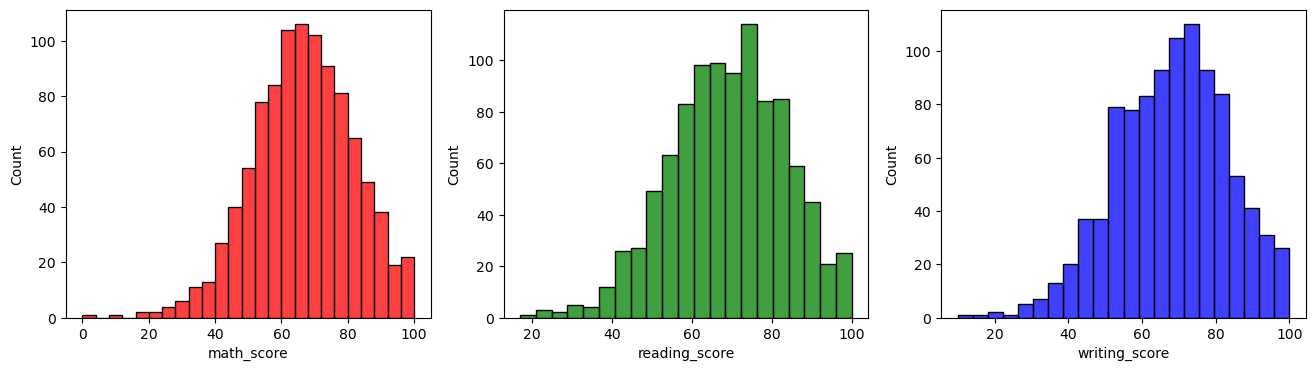

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.histplot(x= 'math_score', data = df, ax = ax[0], color='red')
sns.histplot(x='reading_score', data = df, ax = ax[1], color='green')
sns.histplot(x='writing_score', data = df, ax = ax [2], color= 'blue')

math_mean = df['math_score'].mean()
reading_mean = df['reading_score'].mean()
writing_mean = df['writing_score'].mean()


print(f' Average Score in Math: {math_mean}\n Avergae score in reading: {reading_mean}\n Average score in writing: {reading_mean}\n')

plt.show()


     pass_math  pass_writing  pass_reading
Yes        865           886           910
No         135           114            90


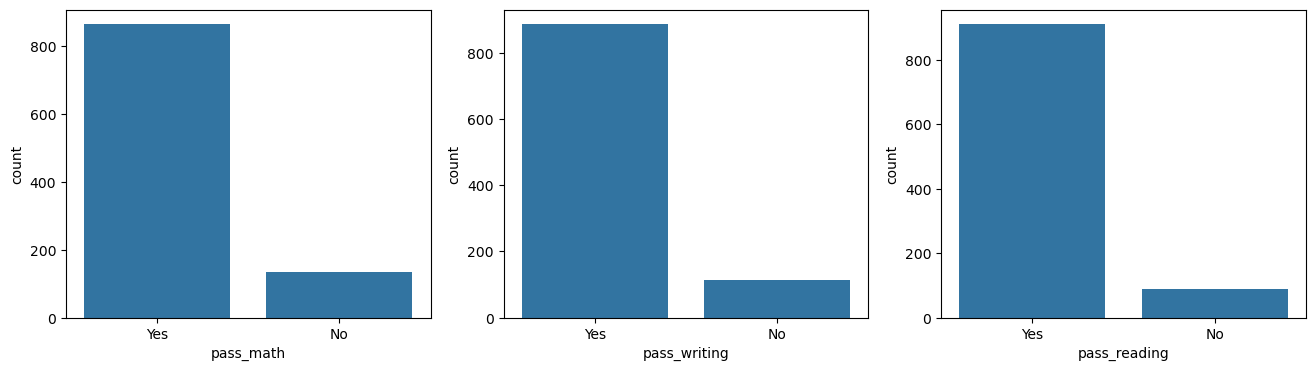

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))
sns.countplot(x= 'pass_math', data= df, ax=ax[0])
sns.countplot(x='pass_writing', data= df, ax=ax[1])
sns.countplot(x='pass_reading', data= df, ax=ax[2])


pass_count = df[['pass_math', 'pass_writing', 'pass_reading']].apply(lambda x: x.value_counts())
print(pass_count)

plt.show()

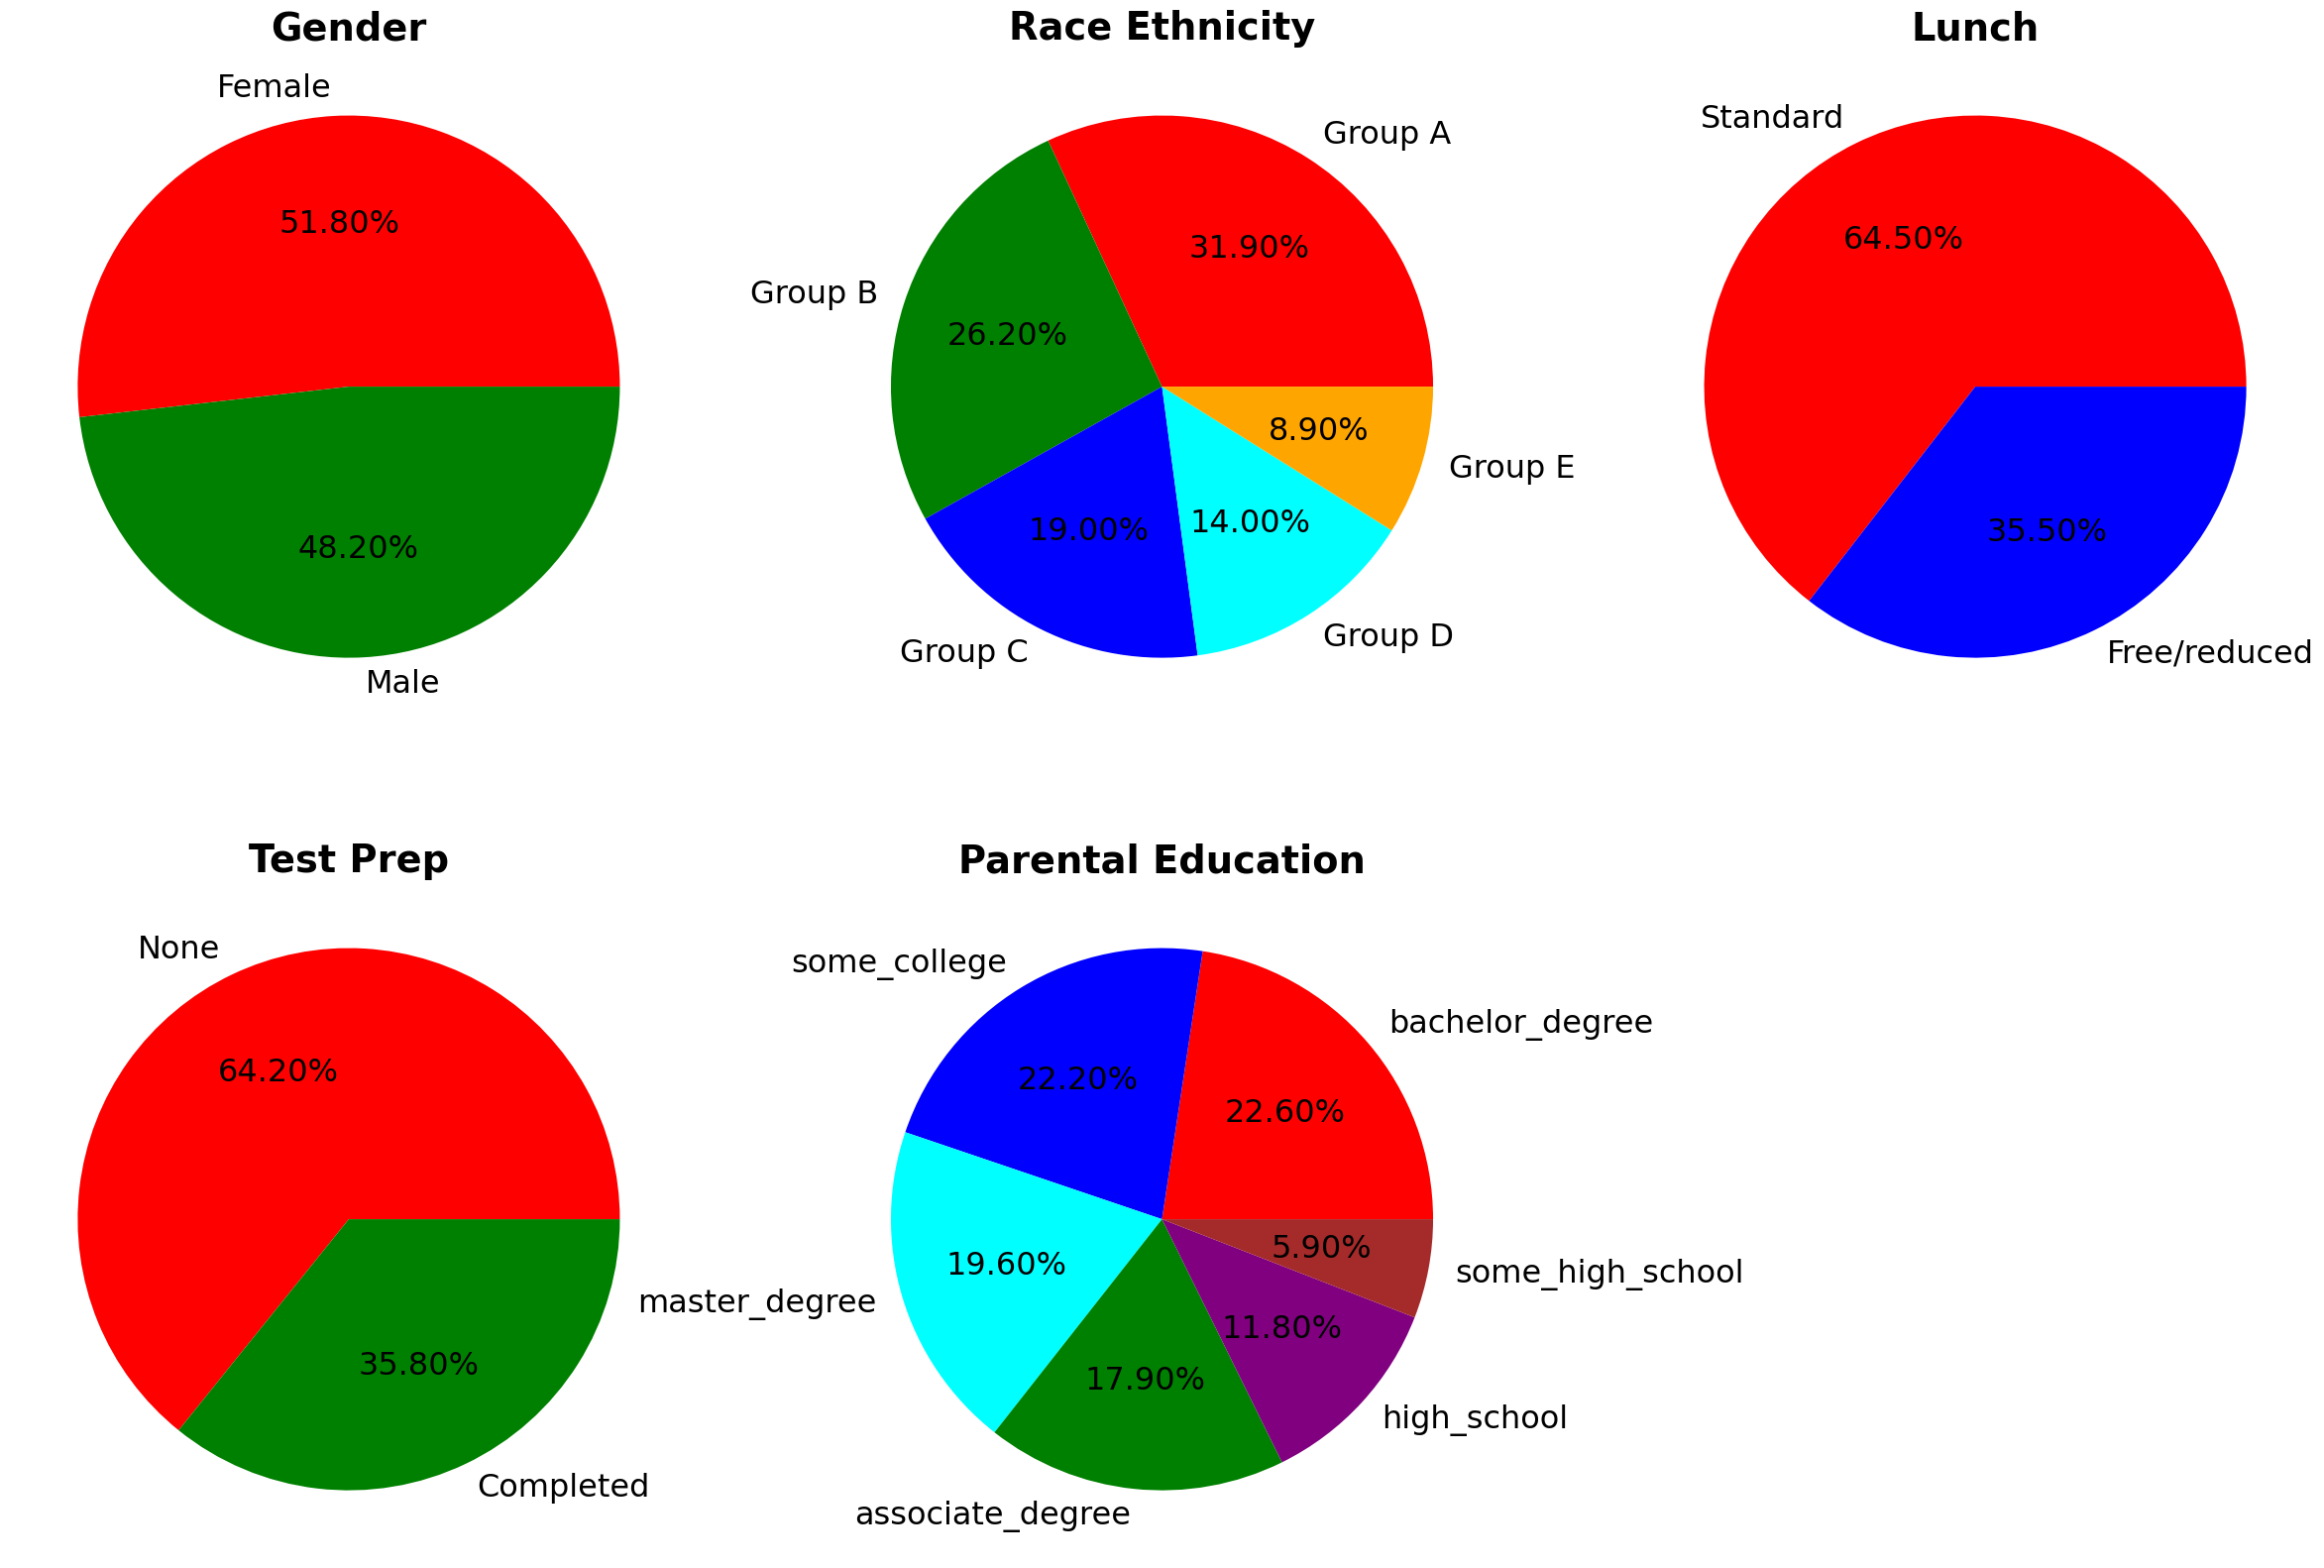

In [27]:
plt.rcParams['figure.figsize'] = (30, 20)
plt.rcParams['font.size'] = 23


plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels=labels, autopct = '%.2f%%')

plt.title('Gender', fontweight='bold')



plt.subplot(2, 3, 2)
size = df['race'].value_counts()
labels = 'Group A', 'Group B','Group C','Group D','Group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct = '%.2f%%')
plt.title('Race Ethnicity', fontweight='bold')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard','Free/reduced'
color = ['red', 'blue']

plt.pie(size, colors=color, labels=labels, autopct= '%.2f%%')
plt.title('Lunch', fontweight='bold')

plt.subplot(2, 3, 4)
size = df['preparation_course'].value_counts()
labels= 'None', 'Completed'
color= ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Prep', fontweight='bold')


plt.subplot(2, 3, 5)
size= df['parents_education'].value_counts()
labels='bachelor_degree', 'some_college', 'master_degree','associate_degree', 'high_school', 'some_high_school'
color= ['red', 'blue', 'cyan', 'green','purple', 'brown']

plt.pie(size, colors=color, labels=labels, autopct= '%.2f%%')
plt.title('Parental Education',fontweight='bold')

plt.show()

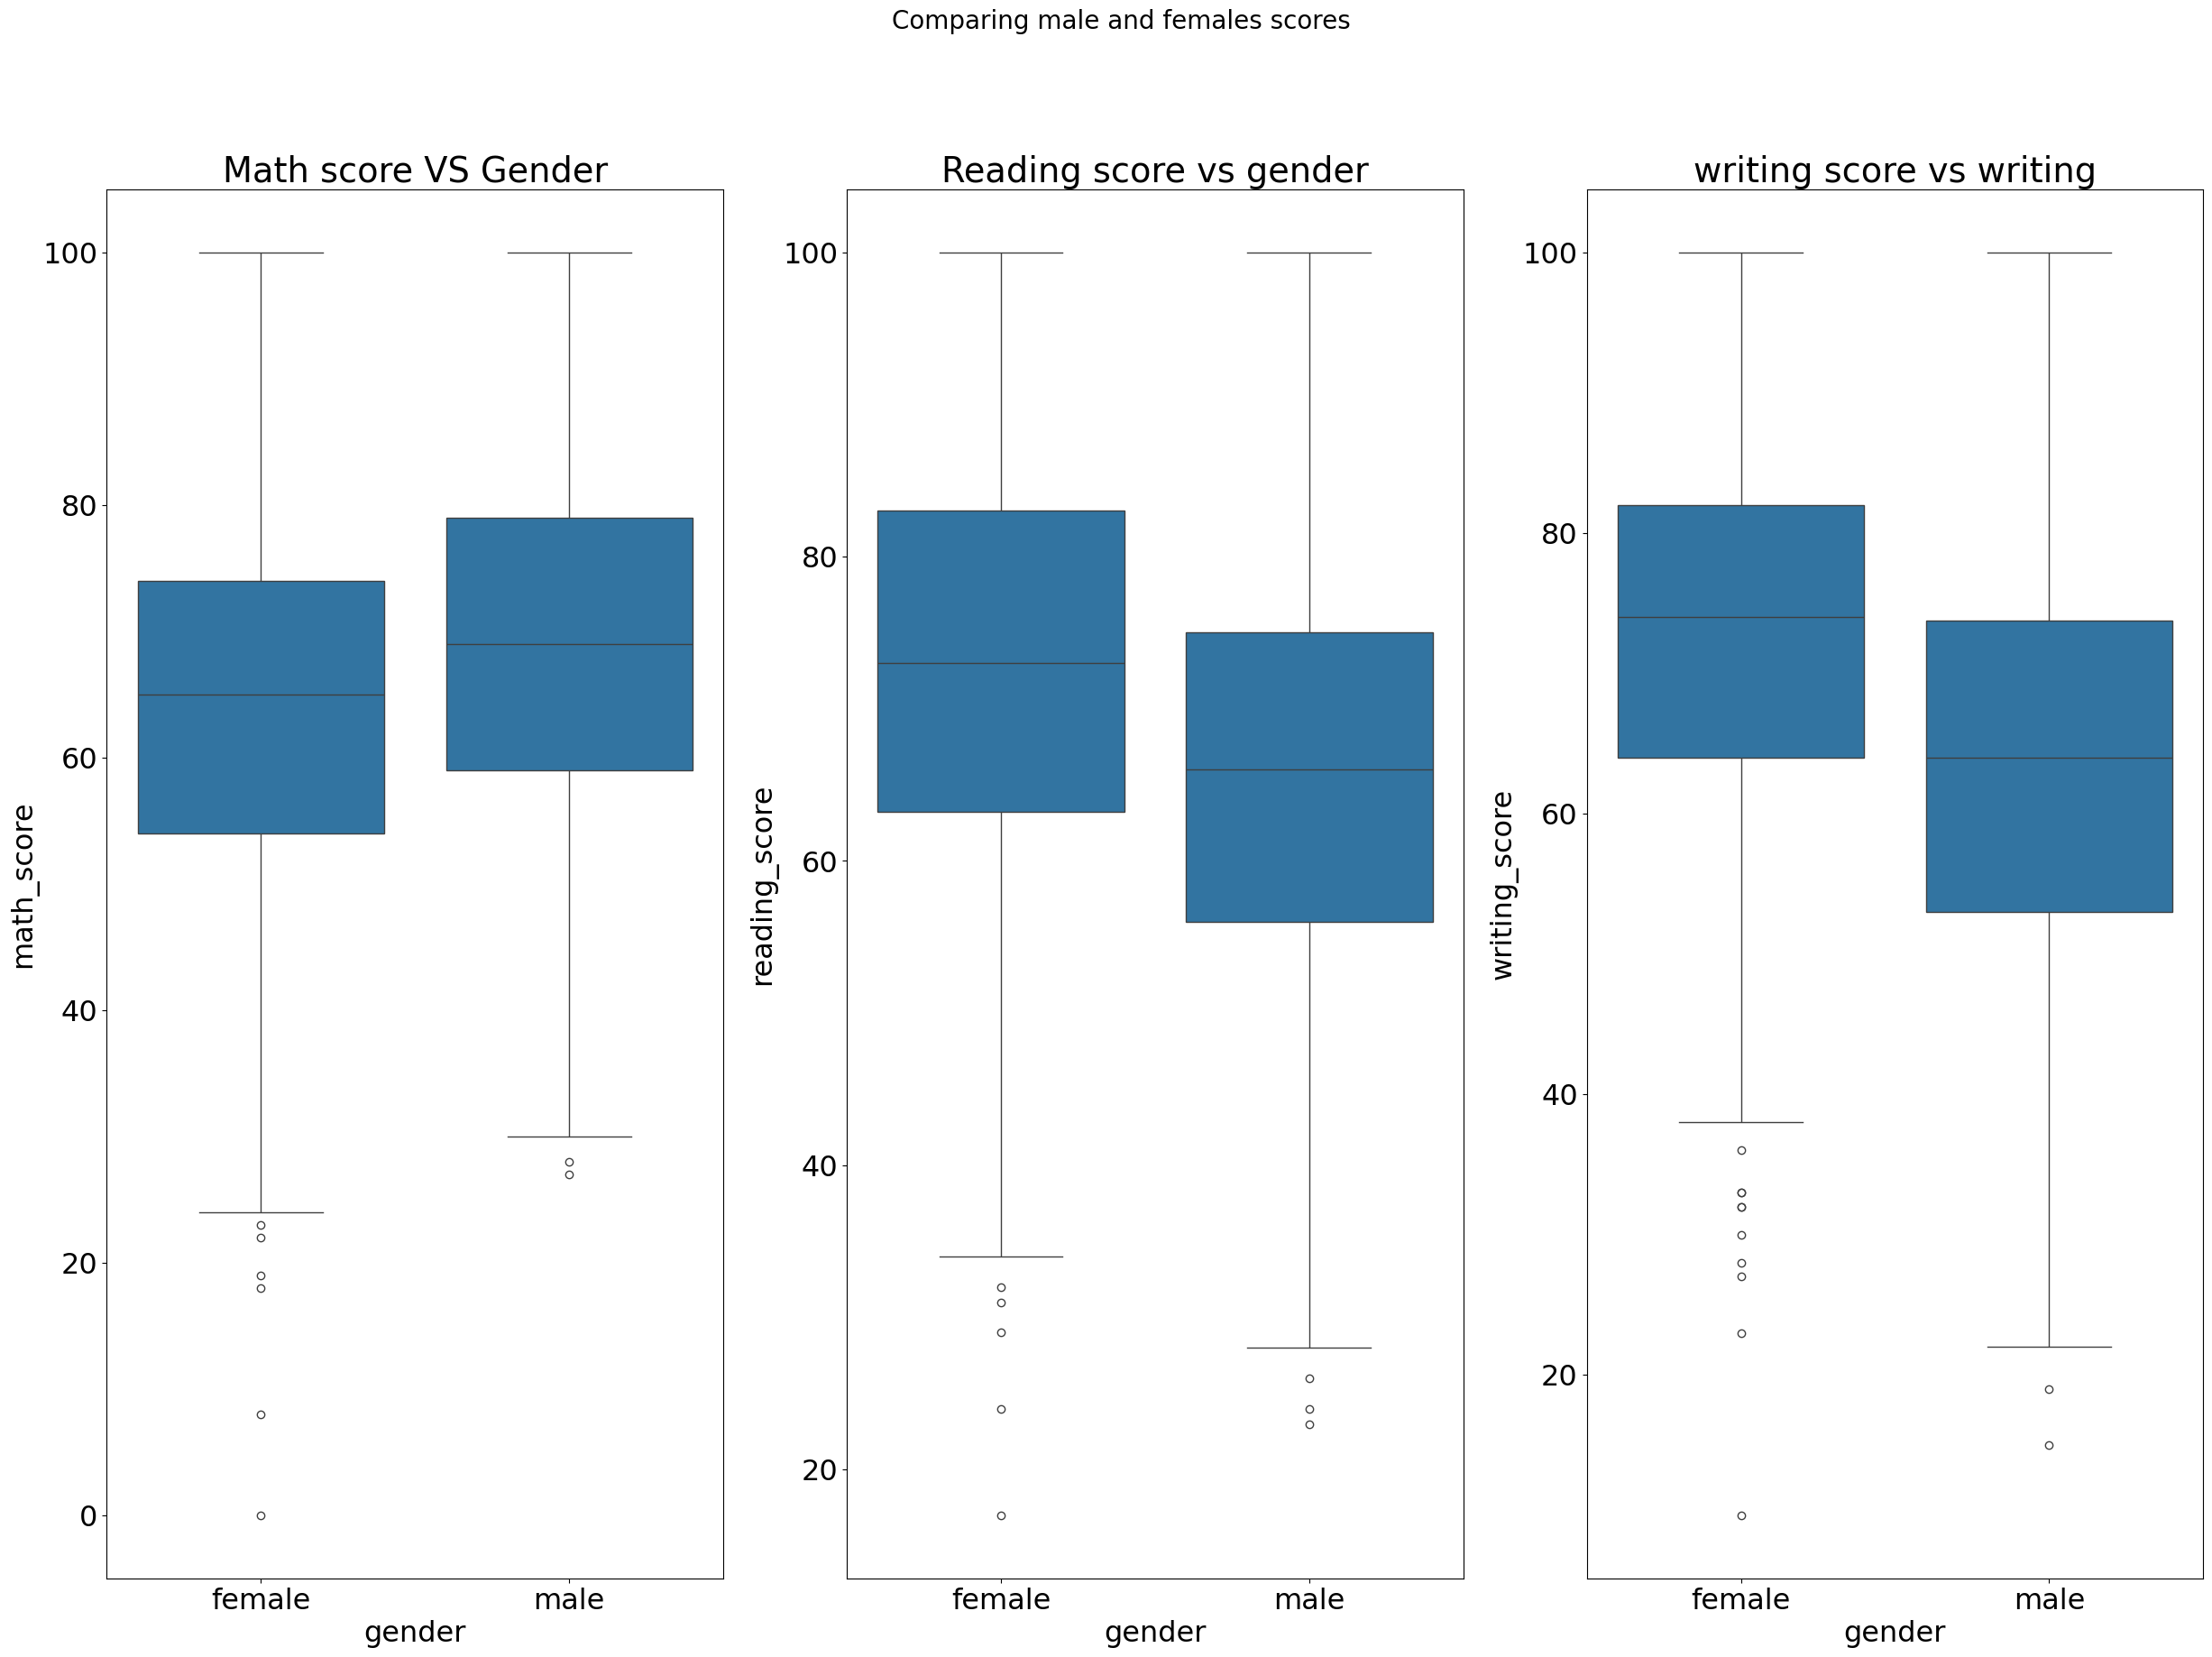

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

fig.suptitle('Comparing male and females scores', fontsize=20)


sns.boxplot(x='gender', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score VS Gender')


sns.boxplot(x='gender', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs gender')

sns.boxplot(x='gender', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('writing score vs writing')


plt.show()

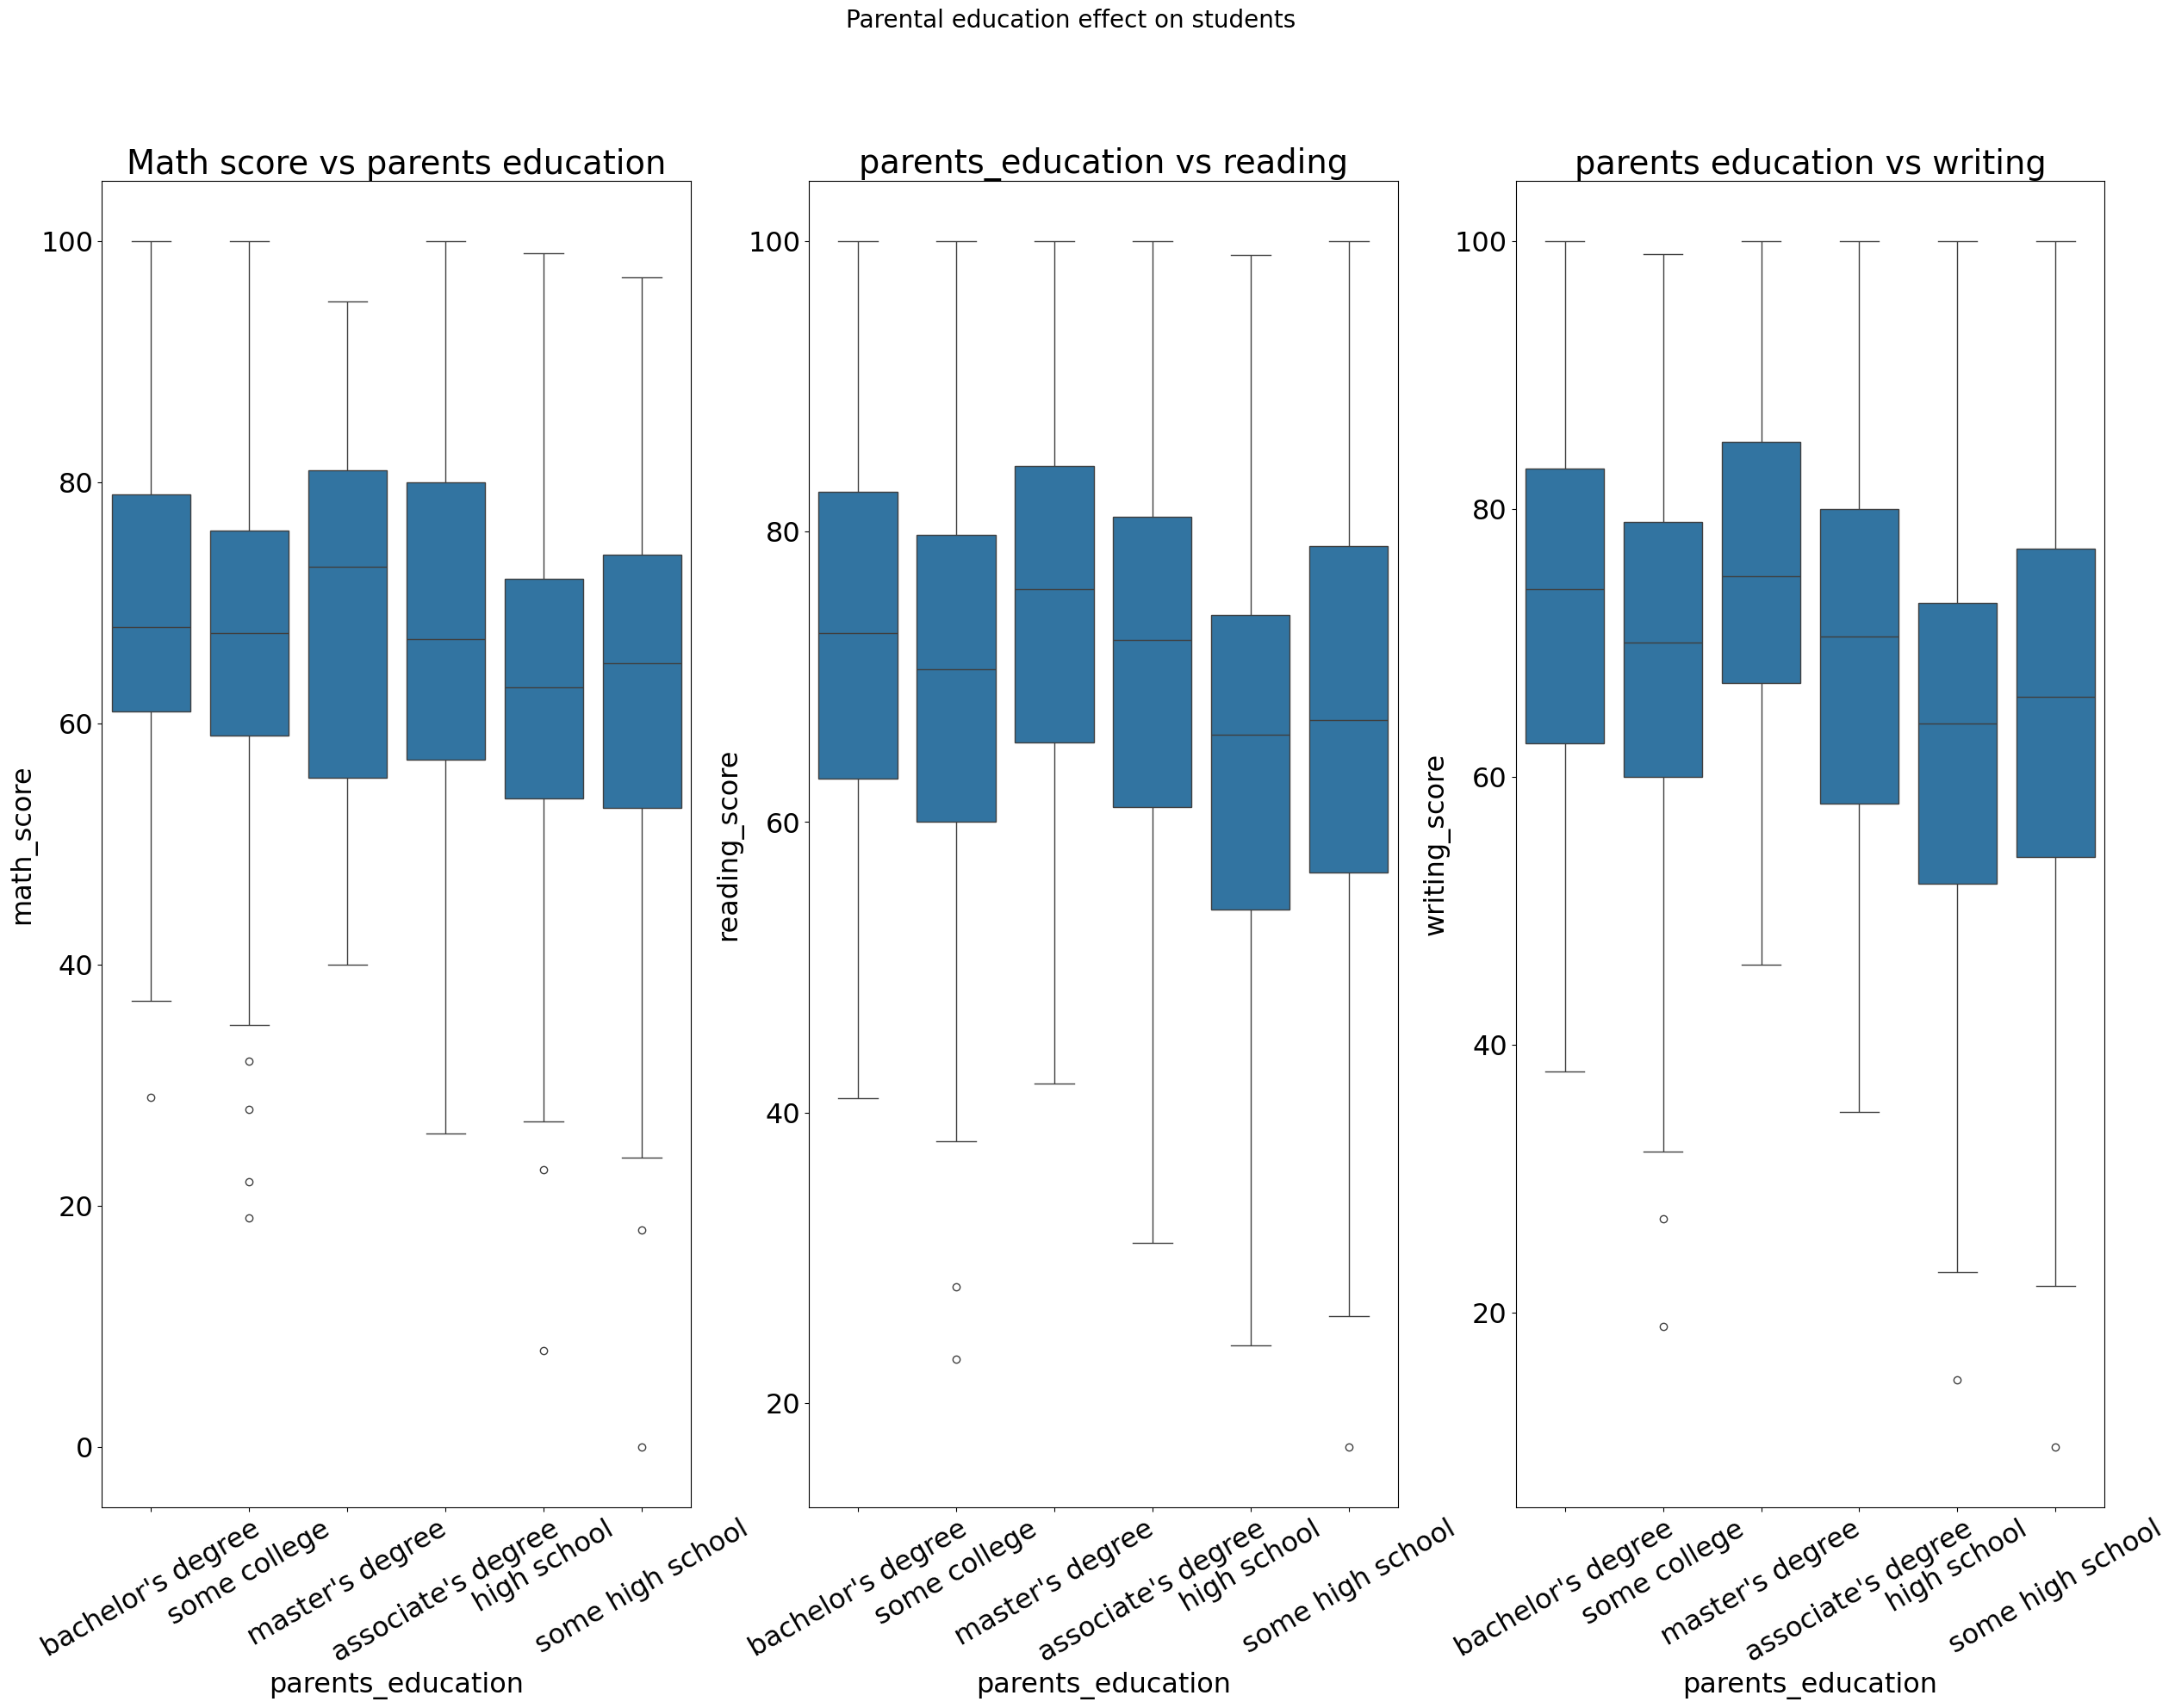

In [45]:
fig , (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Parental education effect on students', fontsize=20)
#same as before

sns.boxplot(x='parents_education', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score vs parents education')

ax1.set_xticks(ax1.get_xticks())
var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
#making the text of each stick rotate so it doesnt intersect. 

sns.boxplot(x='parents_education', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('parents_education vs reading')

ax2.set_xticks(ax2.get_xticks())
var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
#making the text of each stick rotate so it doesnt intersect. 
sns.boxplot(x='parents_education', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('parents education vs writing')

ax3.set_xticks(ax3.get_xticks())
var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)
#making the text of each stick rotate so it doesnt intersect. 

plt.show()

In [49]:
df.nunique()

gender                 2
race                   5
parents_education      6
lunch                  2
preparation_course     2
math_score            81
reading_score         72
writing_score         77
pass_math              2
pass_writing           2
pass_reading           2
dtype: int64